In [3]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.



In [4]:
n=100   # we are going to create 100 synthetic data 

In [5]:
x = torch.ones(n,2) # create array 
x[:,0].uniform_(-1.,1)  # grab uniform random number within range of -1 and 1 and replace it with column 0 of X 
x[:5]

tensor([[-0.6817,  1.0000],
        [-0.9795,  1.0000],
        [-0.5732,  1.0000],
        [ 0.7455,  1.0000],
        [-0.3180,  1.0000]])

In [6]:
a = tensor(3.,2); a     # create coefficient

tensor([3., 2.])

In [7]:
y = x@a + torch.rand(n)  # create a line and add a random value

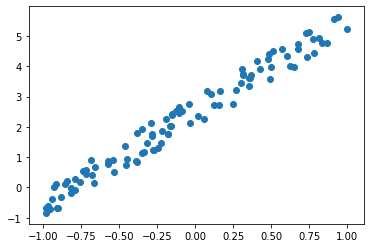

In [8]:
plt.scatter(x[:,0], y);  # plt is the library to plot datas. Here, the code plots the data x and y

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()  # define a function that returns mean squared error value 

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
a = tensor(-1.,1) # put -1. to make it into float type 

In [11]:
y_hat = x@a
mse(y_hat, y) # this approach works well even with millions of data, such as converting pixel values into probability 

tensor(6.6688)

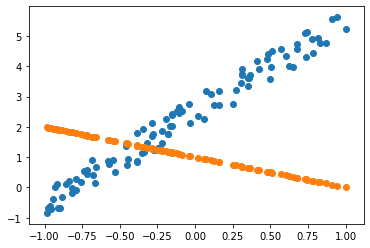

In [12]:
plt.scatter(x[:,0],y)  # plot the x,y
plt.scatter(x[:,0],y_hat); # plot the mean square error this shows how far away the prediction is from the actual number  

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [14]:
def update():   # a loop to update a 
    y_hat = x@a
    loss = mse(y, y_hat) # calulcate mean square error 
    if t % 10 == 0: print(loss) # print loss for each 10 steps
    loss.backward() # calculate gradient 
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [15]:
lr = 1e-1
for t in range(100): update()

tensor(6.6688, grad_fn=<MeanBackward0>)
tensor(1.6380, grad_fn=<MeanBackward0>)
tensor(0.5065, grad_fn=<MeanBackward0>)
tensor(0.2040, grad_fn=<MeanBackward0>)
tensor(0.1224, grad_fn=<MeanBackward0>)
tensor(0.1005, grad_fn=<MeanBackward0>)
tensor(0.0945, grad_fn=<MeanBackward0>)
tensor(0.0929, grad_fn=<MeanBackward0>)
tensor(0.0925, grad_fn=<MeanBackward0>)
tensor(0.0924, grad_fn=<MeanBackward0>)


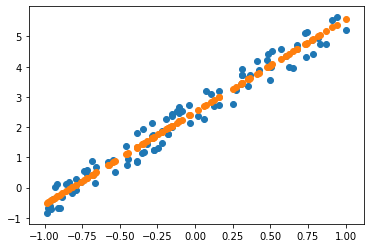

In [16]:
a = a.detach().numpy()
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [20]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [21]:
a = nn.Parameter(tensor(-1.,1))


fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate : the thing that we multiply the gradient by to update the weight 
- Epoch : one completly run to all of the data
- Minibatch :  a subset of all your data during one iteration.
- SGD : gradient percent using minibatches 
- Model / Architecture : the mathetical function that you use to fit the data 
- Parameters : also known as coefficents, weights are the things you are updating through training the model
- Loss function : tell you how far away predictions are from the actual value

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.